In [ ]:
#learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa

# Predict Greenhouse gases concentration

    - Carbon Dioxide (CO2)
    - Methane (CH4)
    - Nitrous Oxide (N2O)

### Import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from scipy import linalg
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sns
import scipy

from sklearn.datasets import fetch_openml
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct, WhiteKernel, RationalQuadratic, ExpSineSquared


In [2]:
### Check version
import sys
import sklearn
print(sys.version)
!python --version
print("numpy: ", np.__version__)
print("sklearn: ", sklearn.__version__)

3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
Python 3.8.3
numpy:  1.19.5
sklearn:  0.24.0


### Data Source

Greenhouse Gases Data from Mauna Loa Observatory, Hawaii
- License: ---


- Authors:  Ed Dlugokencky, Dr. Pieter Tans, Dr. Ralph Keeling

- Source Link: https://www.esrl.noaa.gov/gmd/ccgg/trends/

- Download 1: https://www.esrl.noaa.gov/gmd/webdata/ccgg/trends/co2/co2_mm_mlo.txt
- Download 2: https://www.esrl.noaa.gov/gmd/webdata/ccgg/trends/ch4/ch4_mm_gl.txt
- Download 3: https://www.esrl.noaa.gov/gmd/webdata/ccgg/trends/n2o/n2o_mm_gl.txt

- Data last updated: 2020, 2021


- Origin: Global Monitoring Laboratory, Earth System Research Laboratories, National Oceanic and Atmospheric Administration (NOAA)


- Citation 1: Ed Dlugokencky, NOAA/GML (www.esrl.noaa.gov/gmd/ccgg/trends_ch4/)
- Citation 2: Ed Dlugokencky, NOAA/GML (www.esrl.noaa.gov/gmd/ccgg/trends_n2o/)
- Citation 3: Dr. Pieter Tans, NOAA/GML (www.esrl.noaa.gov/gmd/ccgg/trends/) and Dr. Ralph Keeling, Scripps Institution of Oceanography (scrippsco2.ucsd.edu/).

Scikit-learn:
    - Citation: Jan Hendrik Metzen , Gaussian process regression (GPR) on Mauna Loa CO2 data.

### CO2 prediction

In [3]:
path = '/Users/erv/Desktop/'
data = pd.read_csv(path + 'co2_mm_mlo.txt', header=0, delimiter='\s+')
data.head(2)

,year,month,decimal,average,alized,of,days,mon,mean
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99,NaN
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,NaN


In [4]:
X = np.array(data['decimal']).reshape(-1,1)
y = np.array(data['average'])

print(X.shape, y.shape)

(757, 1) (757,)


In [23]:
k1 = 50.0 * RBF(length_scale=50.0)
k2 = 2.0**2 * RBF(length_scale=100.0) *\
        ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds='fixed')
k3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 0.1**2 * RBF(length_scale=0.1) +\
        WhiteKernel(noise_level=0.1**2, noise_level_bounds=(1e-5, np.inf))

kernel = k1 + k2 + k3 + k4

In [24]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=0, normalize_y=True)
gp.fit(X, y)

print("\nLearned kernel:", gp.kernel_)
print("Log-marginal-likelihood: %.3f" % gp.log_marginal_likelihood(gp.kernel_.theta))


Learned kernel: 2.51**2 * RBF(length_scale=40.4) + 0.0928**2 * RBF(length_scale=162) * ExpSineSquared(length_scale=1.41, periodicity=1) + 0.0569**2 * RationalQuadratic(alpha=0.0344, length_scale=2.67) + 0.00637**2 * RBF(length_scale=0.114) + WhiteKernel(noise_level=4.54e-05)
Log-marginal-likelihood: 2372.447


In [25]:
# Predict
X_ = np.linspace(X.min(), X.max()+30, 1000)[:, np.newaxis]
print(X_.shape, type(X_))

y_pred, y_std = gp.predict(X_, return_std=True)

(1000, 1) <class 'numpy.ndarray'>


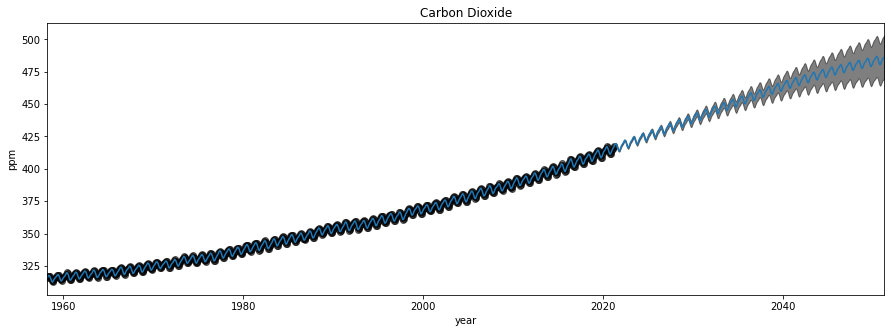

In [26]:
# Plot
fig = plt.figure(figsize=(15,5))
plt.scatter(X, y, c='k', alpha=0.55)
plt.plot(X_, y_pred)
plt.fill_between(X_[:,0], y_pred-y_std, y_pred+y_std, alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("year")
plt.ylabel("ppm")
plt.title("Carbon Dioxide")
plt.show()

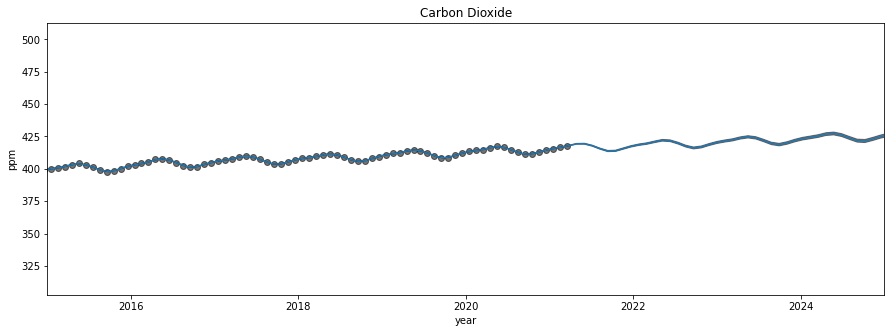

In [27]:
# Plot
fig = plt.figure(figsize=(15,5))
plt.scatter(X, y, c='k', alpha=0.55)
plt.plot(X_, y_pred)
plt.fill_between(X_[:,0], y_pred-y_std, y_pred+y_std, alpha=0.5, color='k')
plt.xlim(2015, 2025)
plt.xlabel("year")
plt.ylabel("ppm")
plt.title("Carbon Dioxide")
plt.show()

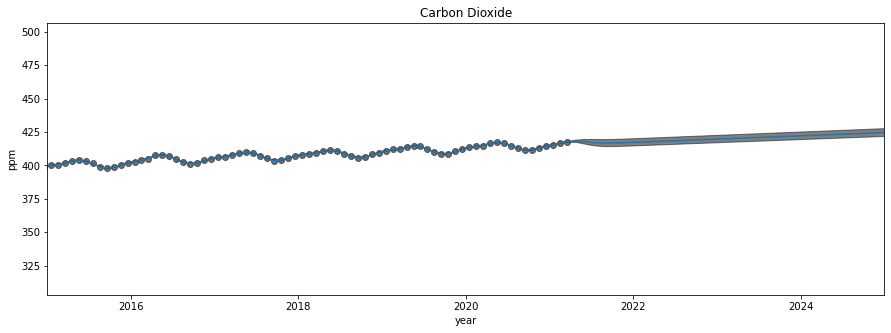

In [22]:
# Plot
fig = plt.figure(figsize=(15,5))
plt.scatter(X, y, c='k', alpha=0.55)
plt.plot(X_, y_pred)
plt.fill_between(X_[:,0], y_pred-y_std, y_pred+y_std, alpha=0.5, color='k')
plt.xlim(2015, 2025)
plt.xlabel("year")
plt.ylabel("ppm")
plt.title("Carbon Dioxide")
plt.show()

### Methane

In [28]:
data = pd.read_csv(path + 'ch4_mm_gl.txt', header=0, delimiter='\s+')
data.head(2)

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.542,1625.9,2.4,1634.6,1.5
1,1983,8,1983.625,1628.0,2.9,1635.3,1.4


In [29]:
X = np.array(data['decimal']).reshape(-1,1)
y = np.array(data['average'])

print(X.shape, y.shape)

(450, 1) (450,)


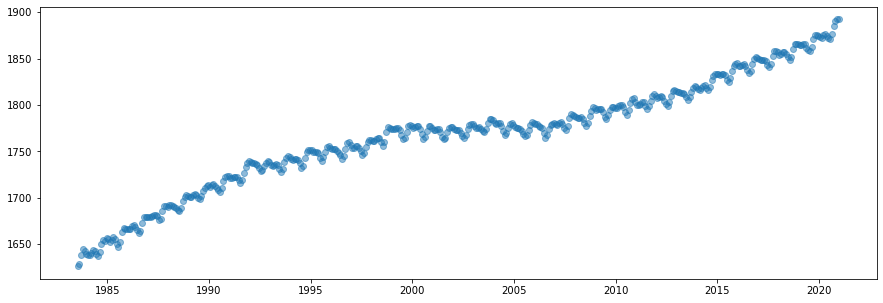

In [32]:
fig = plt.figure(figsize=(15,5))
plt.scatter(X, y, alpha=0.5)

In [33]:
k1 = 2.0**2 * RBF(length_scale=100.0) *\
     ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds='fixed')
k2 = 0.1**2 * RBF(length_scale=0.1) +\
     WhiteKernel(noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5))
k3 = 2.0**2 * RBF(length_scale=1.0) *\
     ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds='fixed')

kernel = k1 + k2 + k3

In [37]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=0, normalize_y=True, n_restarts_optimizer=3)
gp.fit(X, y)

print("\nLearned kernel:", gp.kernel_)
print("Log-marginal-likelihood: %.3f" % gp.log_marginal_likelihood(gp.kernel_.theta))


Learned kernel: 3.29**2 * RBF(length_scale=94) * ExpSineSquared(length_scale=3.61, periodicity=1) + 0.0288**2 * RBF(length_scale=0.113) + WhiteKernel(noise_level=1e-05) + 0.248**2 * RBF(length_scale=1.96) * ExpSineSquared(length_scale=1.29e+04, periodicity=1)
Log-marginal-likelihood: 1184.462


/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


In [38]:
# Predict
X_ = np.linspace(X.min(), X.max()+30, 1000)[:, np.newaxis]
print(X_.shape, type(X_))

y_pred, y_std = gp.predict(X_, return_std=True)

(1000, 1) <class 'numpy.ndarray'>


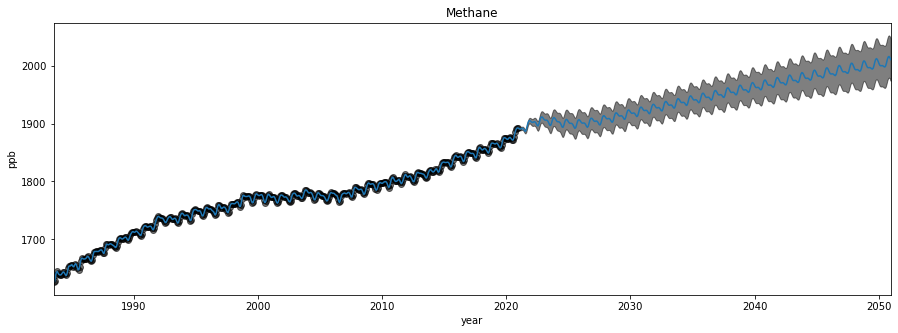

In [40]:
# Plot
fig = plt.figure(figsize=(15,5))
plt.scatter(X, y, c='k', alpha=0.55)
plt.plot(X_, y_pred)
plt.fill_between(X_[:,0], y_pred-y_std, y_pred+y_std, alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("year")
plt.ylabel("ppb")
plt.title("Methane")
plt.show()

### Nitrous Oxide

In [41]:
data = pd.read_csv(path + 'n2o_mm_gl.txt', header=0, delimiter='\s+')
data.head(2)

,year,month,decimal,average,average_unc,trend,trend_unc
0,2001,1,2001.042,316.3,0.2,316.0,0.2
1,2001,2,2001.125,316.3,0.2,316.1,0.2


In [42]:
X = np.array(data['decimal']).reshape(-1,1)
y = np.array(data['average'])

print(X.shape, y.shape)

(239, 1) (239,)


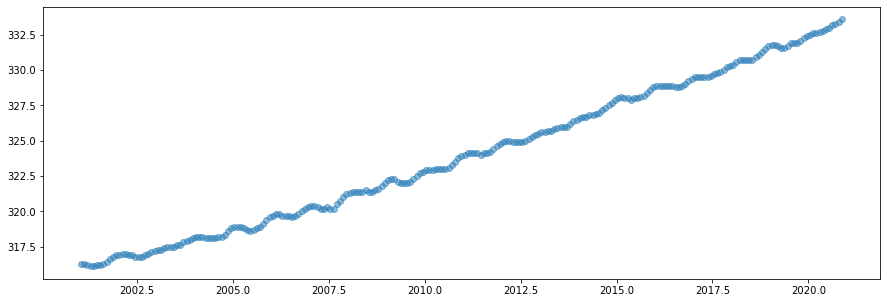

In [43]:
fig = plt.figure(figsize=(15,5))
plt.scatter(X, y, alpha=0.5)

In [46]:
k1 = 2.0**2 * RBF(length_scale=100.0) *\
     ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds='fixed')
k2 = 0.1**2 * RBF(length_scale=0.1) +\
     WhiteKernel(noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5))
k3 = 2.0**2 * RBF(length_scale=100.0) *\
     ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds='fixed')

kernel = k1 + k2 + k3

In [47]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=0, normalize_y=True, n_restarts_optimizer=3)
gp.fit(X, y)

print("\nLearned kernel:", gp.kernel_)
print("Log-marginal-likelihood: %.3f" % gp.log_marginal_likelihood(gp.kernel_.theta))


Learned kernel: 2.39**2 * RBF(length_scale=31.5) * ExpSineSquared(length_scale=149, periodicity=1) + 0.0251**2 * RBF(length_scale=0.197) + WhiteKernel(noise_level=4.31e-05) + 2.39**2 * RBF(length_scale=31.5) * ExpSineSquared(length_scale=149, periodicity=1)
Log-marginal-likelihood: 689.381


In [48]:
# Predict
X_ = np.linspace(X.min(), X.max()+30, 1000)[:, np.newaxis]
print(X_.shape, type(X_))

y_pred, y_std = gp.predict(X_, return_std=True)

(1000, 1) <class 'numpy.ndarray'>


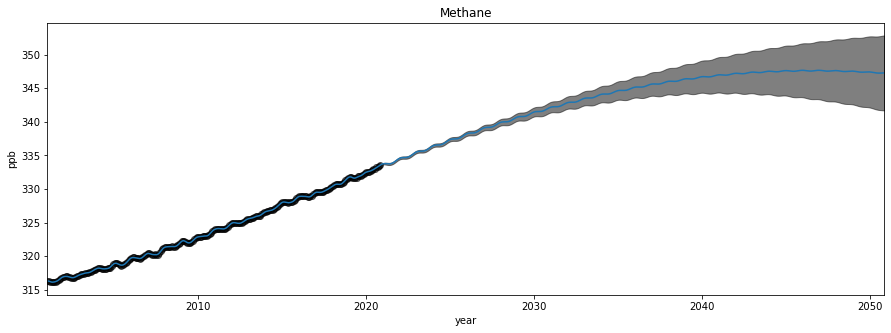

In [49]:
# Plot
fig = plt.figure(figsize=(15,5))
plt.scatter(X, y, c='k', alpha=0.55)
plt.plot(X_, y_pred)
plt.fill_between(X_[:,0], y_pred-y_std, y_pred+y_std, alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("year")
plt.ylabel("ppb")
plt.title("Nitrous Oxide")
plt.show()

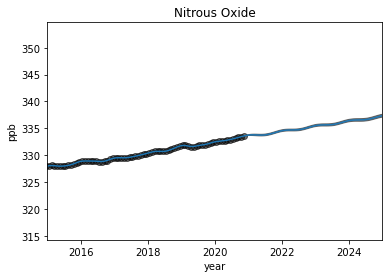

In [51]:
# Plot
#fig = plt.figure(figsize=(15,5))
plt.scatter(X, y, c='k', alpha=0.55)
plt.plot(X_, y_pred)
plt.fill_between(X_[:,0], y_pred-y_std, y_pred+y_std, alpha=0.5, color='k')
plt.xlim(2015, 2025)
plt.xlabel("year")
plt.ylabel("ppb")
plt.title("Nitrous Oxide")
plt.show()

# Congratulations on completing the machine learning project!
## Hope you enjoyed the data analysis. Thank you !!!
### Please like, share and subscribe to learndataa¶

https://www.youtube.com/c/learndataa



In [ ]:
#learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa